## Exercise in Photogrammetry I
## **Ex.3 : Histograms and Image Transformations**
### Hand out: xx.xx.xxxx
### Submission: xx.xx.xxxx 
### Points: 17

## A. Histogram Basics *(10 points)*
In this exercise, you will learn how to apply image transformations and how to compute histograms. Whenever you define a **function** write a **docstring** which gives details about the function itself as well as input and output.

For example: 
```
def my_function(arg1, arg2):
    """ Explain what your function does.

    Args:
        arg1: Explain the first argument.
        arg2: Explain the second argument.

    Returns:
        Give details about the return value.
    """
    ...
    return True
```

**Tasks:**
1. import all necessary modules to modify, load and visualize images *(0 points)*
2. Load ```images/cube.jpg``` as a **grayscale** image. Make sure that the pixels are within [0, 255] and the underlying datatype is *uint8*. Finally visualize the image and print out its minimum and maximum value as well as its data type. *(2 points)*
3. Define a **function** ```histogram(image)``` which takes as input an image [np.array] and returns its histogram [np.array]. The histogram should have 256 bins. Do not use built-in python functions which compute the histogram for you! *(3 points)*
4. Define a **function** ```cumulativeHistogram(hist)``` which takes as input a histogram [np.array] and returns the cumulative histogram [np.array]. The histogram should have 256 bins as well. *(3 points)*
5. **Compute** the **histogram** and **cumulative histogram** of the grayscale cube image by calling your previously defined functions. <br>Finally, **plot** the results and assign proper **labels** to both **axis**. *(2 points)*
<br>**Hint:** use ```plt.bar(...)``` for the histogram and ```plt.plot(...)``` for the cumulative histogram.

In [1]:
# 1. Import modules
%matplotlib inline
import matplotlib.pyplot as plt
from skimage import io, img_as_ubyte
import numpy as np

[]

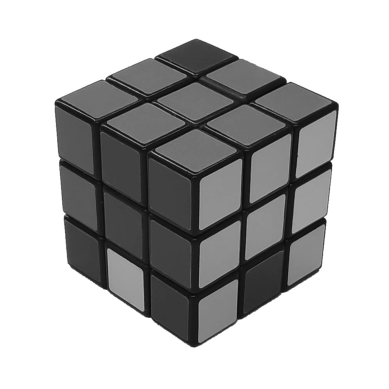

In [23]:
# 2. Load and visualize image
image = io.imread('images/cube.jpg', as_gray=True)
image8bytes = (image * 255).astype(np.uint8)
plt.imshow(image8bytes, cmap='gray')
plt.axis('off')
plt.plot()

In [29]:
# Print out the minimum and maximum value of the displayed image as well as its data type
print(image8bytes.min())
print(image8bytes.max())
print(image8bytes.dtype)

0
255
uint8


In [70]:
# 3. Define your function called histogram(image) here:
def histogram(image: np.ndarray) -> np.ndarray:
    '''
    Creates a histogram of a given image.
    
    Parameters:
    - image (np.ndarray): Given image matrix (rows x columns).
    
    Returns:
    - np.ndarray: Histogram 1D array.
    '''
    
    # Allocate memory. We know we have a 8byte greyscale image.
    ret_histo = np.zeros(256, dtype=np.uint8)
    
    # Go through every pixel, read it's brightness, and increment corresponding histogram index.
    for row in range(image.shape[0]):
        for column in range(image.shape[1]):
            brightness = image[row][column]
            ret_histo[brightness] += 1
    
    return ret_histo

In [85]:
# 4. Define your function called cumulativeHistogram(hist) here:
def cumulativeHistogram(hist: np.ndarray) -> np.ndarray:
    '''
    Creates a cumulative histogram out of a given histogram.
    
    Parameters:
    - hist (np.ndarray): Given histogram (1D array containing amount of pixels for every brightness index).
    
    Returns:
    - np.ndarray: Cumulative histogram array (1D array containing cumulative percentage of all pixels 
    at every brightness index).
    '''
    # Allocate memory for cumulative histogram array.
    ret_cumul_histo = np.zeros(len(hist))
    
    # Get total amount of pixels. We need this to know the percentage.
    total_pixels_count = 0
    for pixels in hist:
        total_pixels_count += pixels
    
    # Sum at current step.
    sum_current_step = 0
    
    # Fill the cumulative histogram array with percentages.
    for index in range(len(ret_cumul_histo)):
        sum_current_step += hist[index]
        ret_cumul_histo[index] = sum_current_step / total_pixels_count
    
    return ret_cumul_histo

In [87]:
# 5. Compute the histogram and cumulative Histogram
histogram_original = histogram(image8bytes)
histogram_original_cumulative = cumulativeHistogram(histogram_original)

## B. Histogram Equalization *(7 points)*
You have learned the concept for **histogram equalization** in the lecture. It transforms the image such that all intensities are used equally often. 

**Tasks:**
1. Define a **function** ```imageEqualization(image)``` which takes an image as input and returns the transformed image after applying the histogram equalization. *(3 points)*
2. **Compute** the **equalized** grayscale **cube image** and **visualize** it next to the original image. Set the title of each image properly. **Explain** your **observations** in the markdown cell below. *(2 points)*
3. **Compute** the **histogram** and **cumulative histogram** of the equalized image. **Plot** both histograms. In the markdown cell below **describe** the **differences** with respect to the original histograms. *(2 points)*

In [158]:
# 1. Define your function called imageEqualization(image) here:
def imageEqualization(image : np.ndarray) -> np.ndarray:
    '''
    Performs image equalization, essentialy normalizing the histogram of the image
    over whole range - resulting in stronger contrasts.
    
    Parameters:
    - image (np.ndarray): Given image to equalize (rows x columns).
    
    Returns:
    - np.ndarray: Equalized image with stronger contrasts (rows x columns).
    '''
    # Following https://www.youtube.com/watch?v=rZSYTSPrLH8 35:20.
    
    # Allocate memory for the equalized image.
    ret_equalized_image = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
    
    # Find the number of pixels in the image.
    N = image.shape[0] * image.shape[1]
    
    # Generate the cumulative histogram of the original image.
    histogram_original = histogram(image)
    histogram_original_cumulative = cumulativeHistogram(histogram_original) * N
    
    H_0 = histogram_original_cumulative[0] # Cumulative intensity of the first bin.
    
    for row in range(image.shape[0]):
        for column in range (image.shape[1]):
            H_a = histogram_original_cumulative[image[row][column]] # Cumulative intensity of pixel a.
            f_a = round(255 * (H_a - H_0) / (N - H_0)) # Histogram Equalization.
            ret_equalized_image[row, column] = f_a
    
    return ret_equalized_image

[]

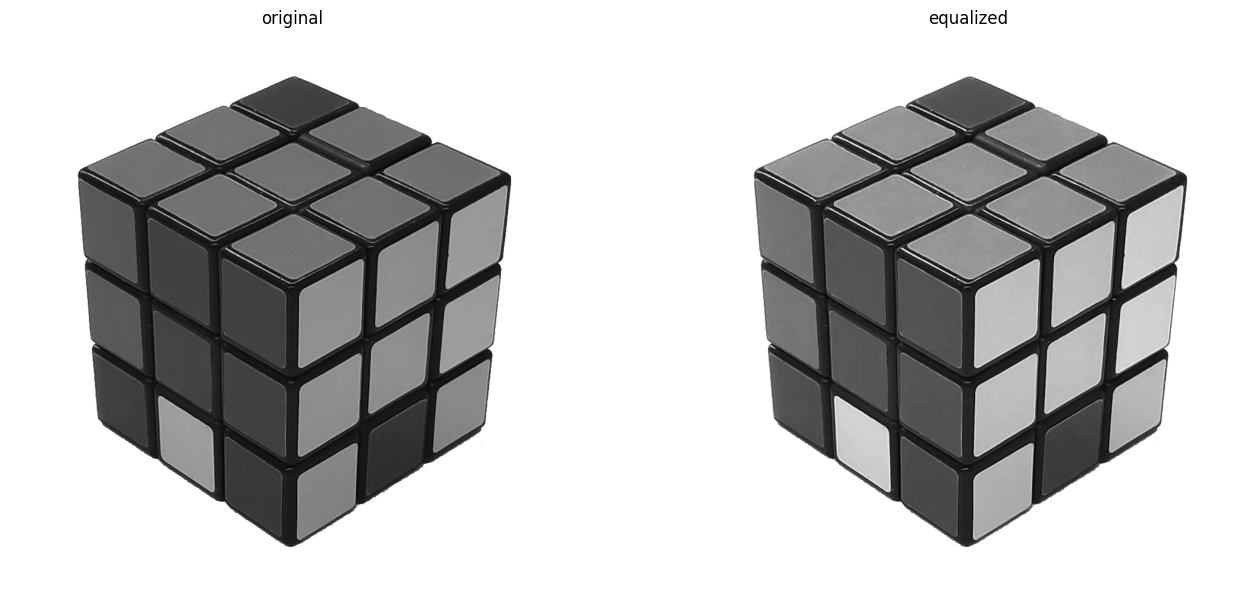

In [160]:
# 2. Compute equalized image
image_equalized = imageEqualization(image8bytes)

fig, axes = plt.subplots(ncols=2, figsize=(16,16))

axes[0].imshow(image8bytes, cmap='gray')
axes[1].imshow(image_equalized, cmap='gray')

axes[0].set_axis_off()
axes[1].set_axis_off()

axes[0].set_title('original')
axes[1].set_title('equalized')

plt.plot()

**2. Explain your observations here:**

- There's more visible contrast, especially on the top of the cube, you can notice the noise more visibly.

[]

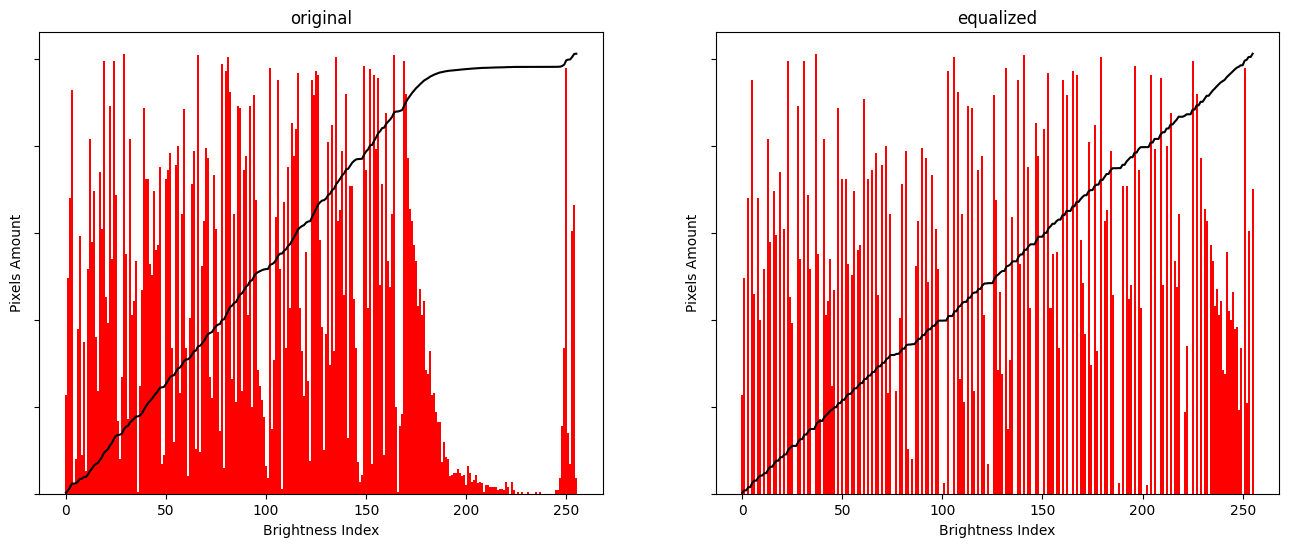

In [173]:
# 3. Compute the histogram and cumulative histogram of the equalized image
histogram_equalized = histogram(image_equalized)
histogram_equalized_cumulative = cumulativeHistogram(histogram_equalized)

fig, subplots = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

subplots[0].bar(np.arange(256), histogram_original, width=1, color='r')
histogram_original_cumulative_mapped = histogram_original_cumulative * histogram_original.max()
subplots[0].plot(histogram_original_cumulative_mapped, color='k')
subplots[0].set_title('original')
subplots[0].set_xlabel('Brightness Index')
subplots[0].set_ylabel('Pixels Amount')
subplots[0].set_yticklabels([])

subplots[1].bar(np.arange(256), histogram_equalized, width=1, color='r')
histogram_equalized_cumulative_mapped = histogram_equalized_cumulative * histogram_equalized.max()
subplots[1].plot(histogram_equalized_cumulative_mapped, color='k')
subplots[1].set_title('equalized')
subplots[1].set_xlabel('Brightness Index')
subplots[1].set_ylabel('Pixels Amount')
subplots[1].set_yticklabels([])

plt.plot()

**3. Explain your observations here:**

- The equalized histogram is clearly distributed more equally. It's very visible on the cumulative line being more straight.